# Drive operations

In [1]:
# Mount Google Drive
from google.colab import drive # import drive from google colab

ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)


drive.mount(ROOT, force_remount=True)           # we mount the google drive at /content/drive

/content/drive
Mounted at /content/drive


In [2]:
%cd 'drive/My Drive/Workspaces/aerial_image_object_detection'

/content/drive/My Drive/Workspaces/aerial_image_object_detection


In [5]:
%pwd

'/content/drive/My Drive/Workspaces/aerial_image_object_detection'

# Data import

## Kaggle operations

In [11]:
! pip install -q kaggle

In [12]:
! pip install --upgrade kaggle

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.9)


In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bikramdutta","key":"bf444a1368eac7ee1cd4e745d095904a"}'}

In [5]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [14]:
! chmod 600 ~/.kaggle/kaggle.json



In [17]:
! kaggle competitions download -c 'aerial-cactus-identification'

 26% 5.00M/19.2M [00:00<00:00, 50.6MB/s]
100% 19.2M/19.2M [00:00<00:00, 94.4MB/s]
  0% 0.00/667k [00:00<?, ?B/s]
100% 667k/667k [00:00<00:00, 44.0MB/s]
  0% 0.00/4.20M [00:00<?, ?B/s]
100% 4.20M/4.20M [00:00<00:00, 69.1MB/s]
  0% 0.00/160k [00:00<?, ?B/s]
100% 160k/160k [00:00<00:00, 22.7MB/s]


## Data import and inspection

In [18]:
%ls -ltr

total 24825
-rw------- 1 root root       66 Nov 23 15:44 README.md
-rw------- 1 root root       67 Nov 23 16:24 kaggle.json
-rw------- 1 root root 20148140 Nov 23 16:29 train.zip
-rw------- 1 root root   682514 Nov 23 16:29 train.csv
-rw------- 1 root root  4408369 Nov 23 16:29 test.zip
-rw------- 1 root root   164014 Nov 23 16:29 sample_submission.csv
-rw------- 1 root root    15130 Nov 23 16:41 aerial_cactus_identification.ipynb


In [19]:
import pandas as pd

train_df = pd.read_csv('train.csv')

In [20]:
train_df.head()

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


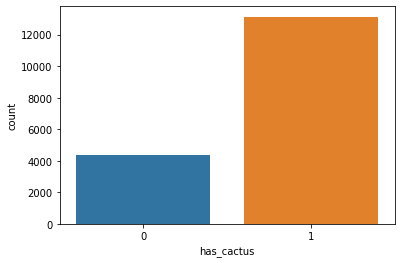

In [23]:
train_df.has_cactus.value_counts(dropna=False)
import seaborn as sns
sns.countplot(train_df.has_cactus)

# Arranging the training data folder wise

In [34]:
categories = ['no_cactus', 'cactus']
import os
PATH = os.path.join(os.getcwd(),'data','aci', 'train')
os.mkdir(PATH) if not os.path.exists(PATH) else print(PATH, 'exists')
for cat in categories:
  cat_path = os.path.join(PATH, cat)
  os.mkdir(cat_path)

/content/drive/My Drive/Workspaces/aerial_image_object_detection/data/aci/train exists


In [39]:
train_df.head()

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1


In [ ]:
!unzip train.zip

In [57]:
train_df.shape

for row in range(train_df.shape[0]):
  category = 'cactus' if train_df.iloc[row,1] == 1 else 'no_cactus'
  PATH = os.path.join(os.getcwd(), category)
  os.mkdir(PATH) if not os.path.exists(PATH) else print(PATH, 'exists')
  os.rename(train_df.iloc[row,0],os.path.join(PATH, category,train_df.iloc[row,0]))

(17500, 2)

In [60]:
for row in range(train_df.shape[0]):
  print(train_df.iloc[row,0])
  break

0004be2cfeaba1c0361d39e2b000257b.jpg


In [58]:
os.getcwd()

'/content/drive/My Drive/Workspaces/aerial_image_object_detection'